## Correlação e Regressão Simples/Multivariada

*Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:*

In [2]:
### IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #biblioteca regressão
from scipy.stats import chi2_contingency

In [3]:
### LEITURA DO DATASET

house = pd.read_csv("/content/kc_house_data.csv.xls")

In [ ]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9999 non-null   int64         
 1   date           9999 non-null   datetime64[ns]
 2   price          9999 non-null   float64       
 3   bedrooms       9999 non-null   int64         
 4   bathrooms      9999 non-null   float64       
 5   sqft_living    9999 non-null   int64         
 6   sqft_lot       9999 non-null   int64         
 7   floors         9999 non-null   float64       
 8   waterfront     9999 non-null   object        
 9   view           9999 non-null   int64         
 10  condition      9999 non-null   int64         
 11  grade          9999 non-null   int64         
 12  sqft_above     9999 non-null   int64         
 13  sqft_basement  9999 non-null   int64         
 14  yr_built       9999 non-null   int64         
 15  yr_renovated   9999 n

In [ ]:
house.describe()

In [4]:
house['date'] = pd.to_datetime(house['date'])

**1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?**

In [5]:
### seleciona variaveis numericas
num_house = house.select_dtypes(include=['float64', 'int64'])
## calcula a matriz de correlação
corr = num_house.corr()

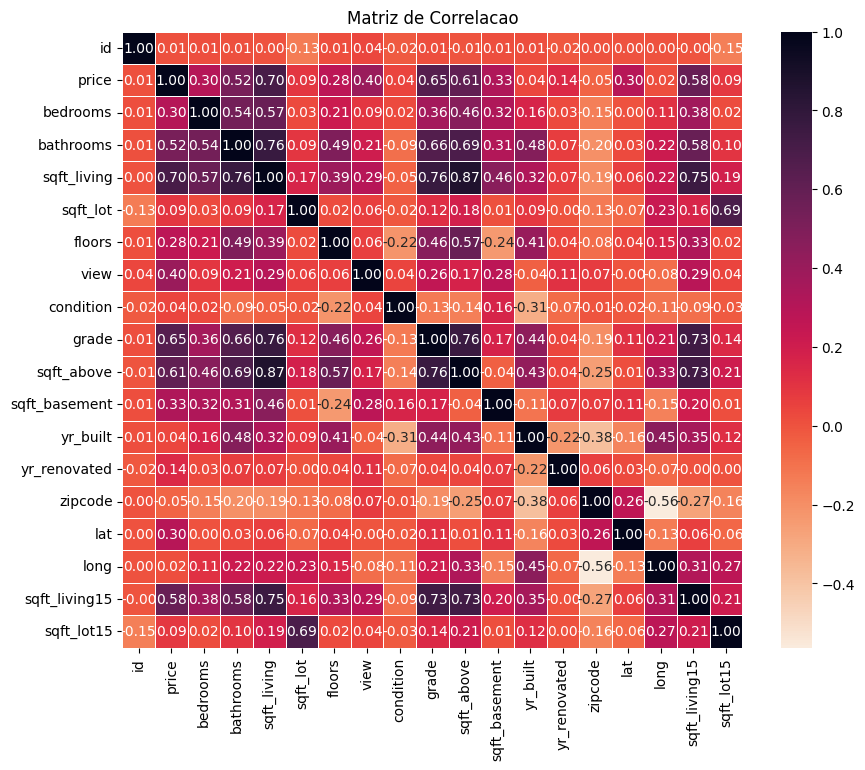

In [6]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='rocket_r', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

In [ ]:
correlation_price_bedrooms = house['price'].corr(house['bedrooms'])
print("Correlação entre preço e número de quartos:", correlation_price_bedrooms)

Correlação entre preço e número de quartos: 0.29920721616918206


> *A correlação de preço e o número de quartos é de 0,30 (arredondando), o que significa um correlação positiva fraca, ou seja, não há tanta influencia do numero de quartos no preço.*

In [ ]:
house_2000_sqft = house[house['sqft_living'] > 2000]

In [ ]:
correlation_2000_sqft = house_2000_sqft['price'].corr(house_2000_sqft['bedrooms'])
print("Correlação entre preço e número de quartos:", correlation_2000_sqft)

Correlação entre preço e número de quartos: 0.11912115548964147


> *Ao filtar a área total superior a 2000 pés temos uma correlação ainda menor sugerindo que a relação entre o preço e a quantidade de quartos pode variar dependendo do tamanho da casa.*

**2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?**

In [ ]:
house_bathrooms = house[house['bathrooms'] > 2]

In [ ]:
correlation_bathrooms = house_bathrooms['price'].corr(house_bathrooms['bathrooms'])
print("Correlação entre preço e número de banheiros:", correlation_bathrooms)

Correlação entre preço e número de banheiros: 0.5264618824165762


> *Ao filtrar casas com mais de 2 banheiros é possível analisar uma correlação positiva moderadamente forte de 0,53 (arredondando), significando que quanto mais banheiros maior o valor do imovel.*

**3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?**

In [ ]:
correlation_bathrooms_sqft = house['bathrooms'].corr(house_bathrooms['sqft_living'])
print("Correlação entre banheiros e a área total da casa:", correlation_bathrooms)

Correlação entre banheiros e a área total da casa: 0.5264618824165762


> *É possível verificar que banheiro e o tamanho da casa tem uma correlação positiva moderadamente forte de 0,53 (arredondando), ou seja, o número de banheiros em uma casa tem uma grande correlação ao tamanho total do imovel*

**4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?**

In [ ]:
house_3000_sqft = house[house['sqft_living'] > 3000]

In [ ]:
correlation_condition_price = house_3000_sqft['condition'].corr(house_3000_sqft['price'])
print("Correlação entre a condição da casa e seu preço:", correlation_condition_price)

Correlação entre a condição da casa e seu preço: 0.10527844723732609


> *Ao filtar a área total superior a 3000 pés, temos uma correlaçaõ entre a condição da casa e seu preço bem fraca de 0,11 (arredondando), ou seja, há outras variaveis que influenciam mais o preço que sua condição*

**5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?**

In [ ]:
house_bedrooms = house[house['bedrooms'] > 3]

In [ ]:
corre_lat_long_price = house_bedrooms[['lat', 'long', 'price']].corr()

print("Correlação entre latitude, longitude e preço:")
print(corre_lat_long_price)

Correlação entre latitude, longitude e preço:
            lat      long     price
lat    1.000000 -0.080279  0.294753
long  -0.080279  1.000000  0.004840
price  0.294753  0.004840  1.000000


> *É possivel analisar que há uma correlação muito fraca com ambas as variaveis de localização geográfica, sendo 0,29 em relação a lat e 0,004 em relaçaõ a long levando em consideração casas com mais de 3 quartos*

**6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Filtrar os dados para considerar apenas casas com ou sem vista para o mar (waterfront)
waterfront_yes = house[house['waterfront'] == 1]
waterfront_no = house[house['waterfront'] == 0]

# Calcular o modelo ANOVA
model = ols('price ~ waterfront', data=house).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Exibir a tabela ANOVA
print(anova_table)

                  sum_sq      df           F         PR(>F)
waterfront  1.250790e+14     1.0  964.573325  2.973808e-202
Residual    1.296339e+15  9997.0         NaN            NaN


> *o p-valor associado à variável categórica waterfront é 2.97, que é extremamente baixo. Isso sugere que há uma correlação significativa entre a variável categórica waterfront e a variável numérica price.*

##Exercicio: Parte 2

*Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:*

In [ ]:
### LEITURA DO DATASET

car = pd.read_csv("/content/car_price.csv.xls")

In [ ]:
car.head()

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [ ]:
car.describe()

**7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.**

In [ ]:
### seleciona variaveis numericas
num_car = car.select_dtypes(include=['float64', 'int64'])
## calcula a matriz de correlação
corr = num_car.corr()

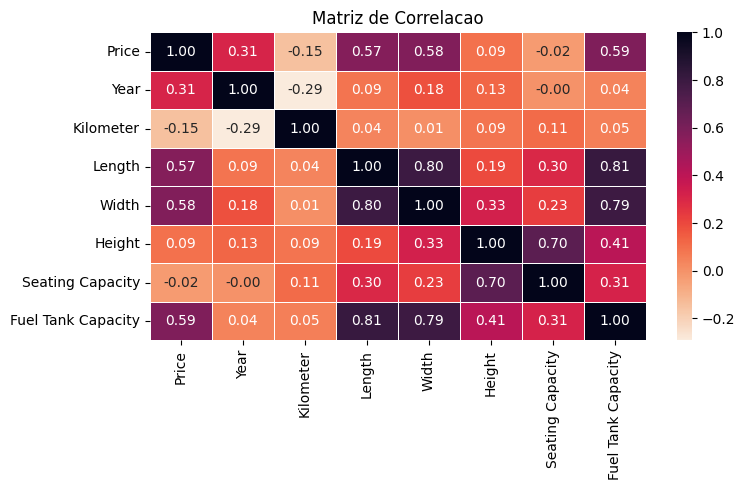

In [ ]:
# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='rocket_r', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

>*Podemos citar como correlação postiva:*

* Capacidade do tanque de combustível (Fuel Tank Capacity) e o preço (price) com valores de 0,59
* Comprimento do carro (length) e a capacidade do tanque de combustível (0,81)
* Largura do carro (Width) e a capacidade do tanque de combustível (0,79)

>*Podemos citar como correlação negativa:*

* Ano do carro (year) e quilometragem (Kilometer) (-0,29)
* Quilometragem e preço (-0,15)
* Capacidade de assento (Seating Capacity) e preço (-0,02)

>*Podemos citar como correlação neutra:*

* Ano e Capacidade de assent (-0,00)

**8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.**

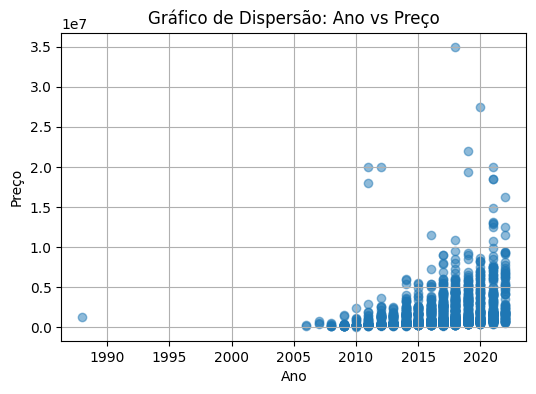

In [ ]:
# Ano e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Year'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Ano vs Preço')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

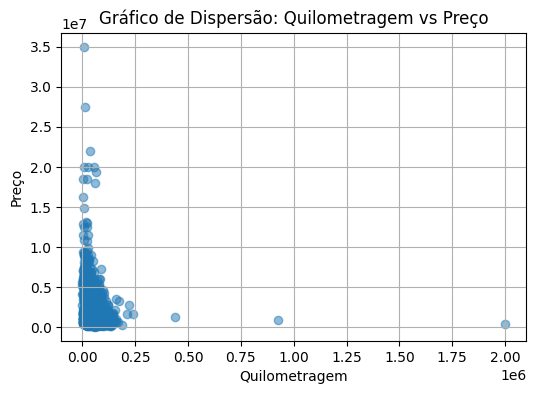

In [ ]:
# Quilometragem e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Kilometer'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Quilometragem vs Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

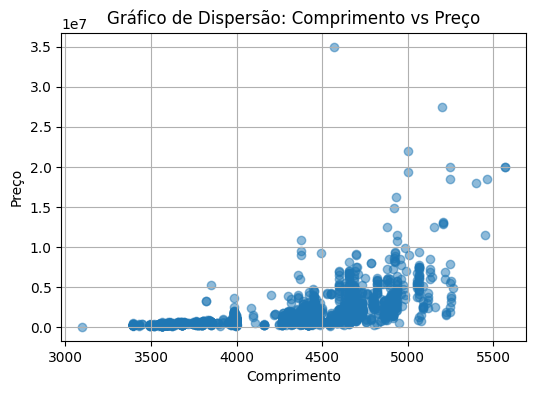

In [ ]:
# Comprimento e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Length'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Comprimento vs Preço')
plt.xlabel('Comprimento')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

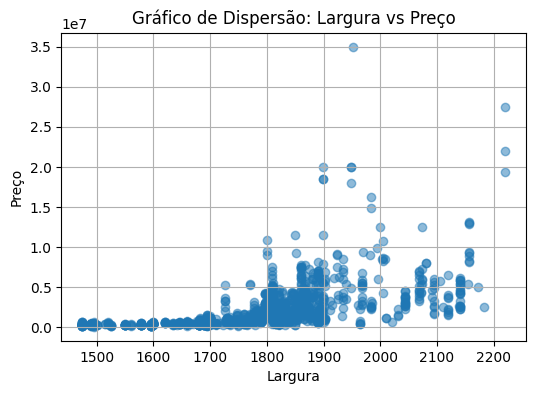

In [ ]:
# Largura e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Width'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Largura vs Preço')
plt.xlabel('Largura')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

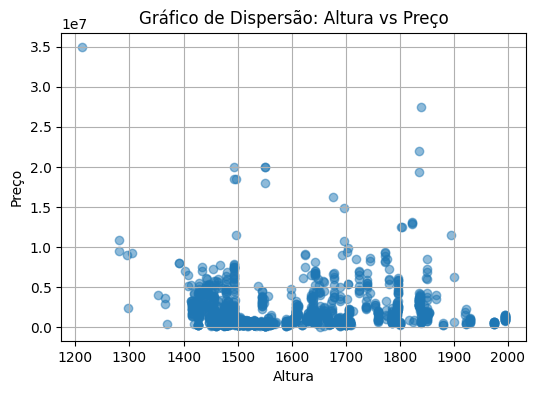

In [ ]:
# Altura e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Height'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Altura vs Preço')
plt.xlabel('Altura')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

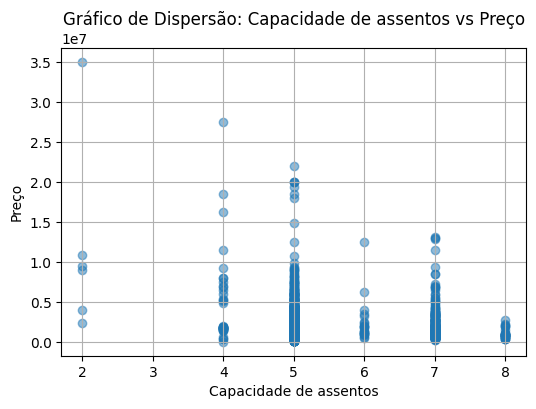

In [ ]:
# Capacidade de assentos e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Seating Capacity'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Capacidade de assentos vs Preço')
plt.xlabel('Capacidade de assentos')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

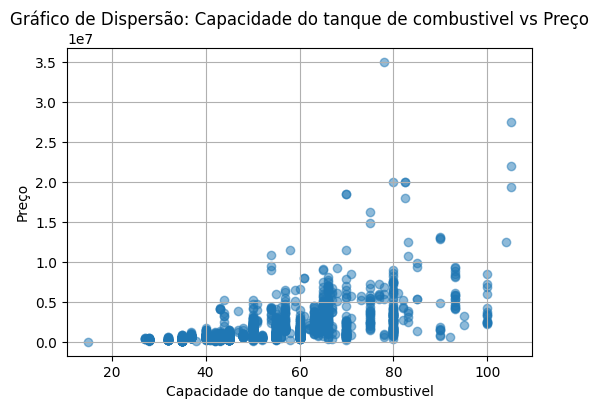

In [ ]:
# Capacidade do tanque de combustivel e Preço
plt.figure(figsize=(6, 4))
plt.scatter(car['Fuel Tank Capacity'], car['Price'], alpha=0.5)
plt.title('Gráfico de Dispersão: Capacidade do tanque de combustivel vs Preço')
plt.xlabel('Capacidade do tanque de combustivel')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

**9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.**

In [ ]:
#Capacidade do tanque de combustível (Fuel Tank Capacity) e o preço (price) com valores de 0,59

In [ ]:
import statsmodels.api as sm

# define a variável explicativa e adiciona uma constante
X = sm.add_constant(car['Fuel Tank Capacity'])

# define a variável de interesse
y = car['Price']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
## gera a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.59e-173
Time:                        14:22:04   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

> Preço do carro = -3.177e+06 + 9.375e+04 * (Capacidade do Tanque de Combustível)

> *R quadrado baixo de  0.344;*

> *p valor abaixo de 0.05 o que é bom;*

> *A cada R$ 1,00 a mais a capacidade do tanque de combustivel aumenta 9.375*

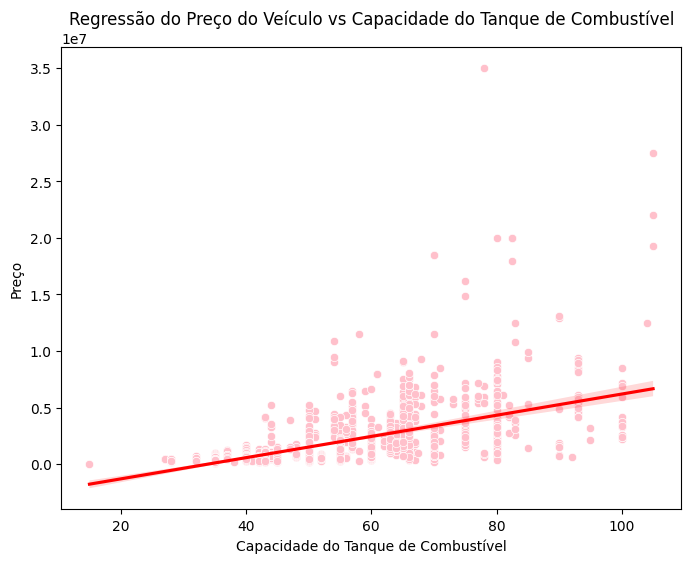

In [ ]:
#grafico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=car, x='Fuel Tank Capacity', y='Price', color='pink', alpha=1)

#linha do grafico
sns.regplot(data=car, x='Fuel Tank Capacity', y='Price', scatter=False, color='red')

# definindo titulos
plt.title('Regressão do Preço do Veículo vs Capacidade do Tanque de Combustível')
plt.xlabel('Capacidade do Tanque de Combustível')
plt.ylabel('Preço')

plt.show()

**10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.**

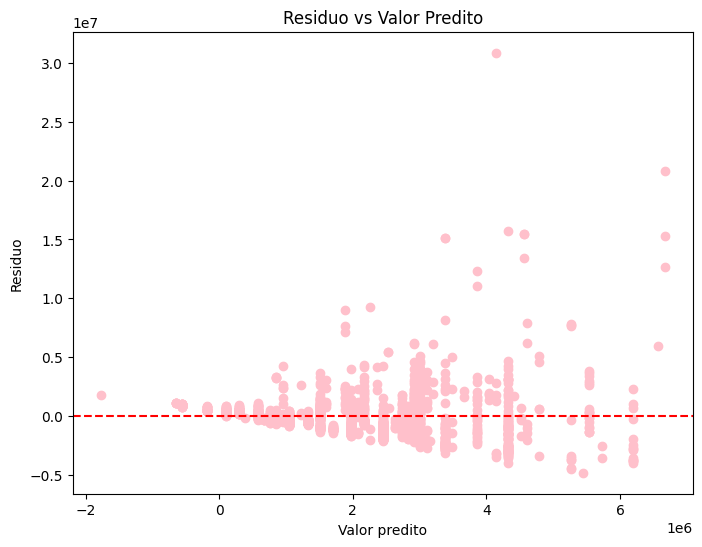

In [ ]:
# salva o dado do resíduo
residuals = model.resid

# calcula o valor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='pink', alpha=1)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

**11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.**

In [ ]:
# seleciona variáveis com correlacao elevada
high_correlation_variables = corr[(corr['Price'] > 0.5) | (corr['Price'] < -0.5)].index.tolist()

high_correlation_variables.remove('Price')

# variáveis selecionadas
selected_variables = ['Price'] + high_correlation_variables

#Aqui, estamos criando uma lista de variáveis selecionadas para análise.
selected_df = car[selected_variables]

In [ ]:
# Fit do modelo
X = sm.add_constant(selected_df.drop(columns=['Price']))

y = selected_df['Price']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.79e-197
Time:                        14:46:05   Log-Likelihood:                -29753.
No. Observations:                1874   AIC:                         5.951e+04
Df Residuals:                    1870   BIC:                         5.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.21e+07   8.16

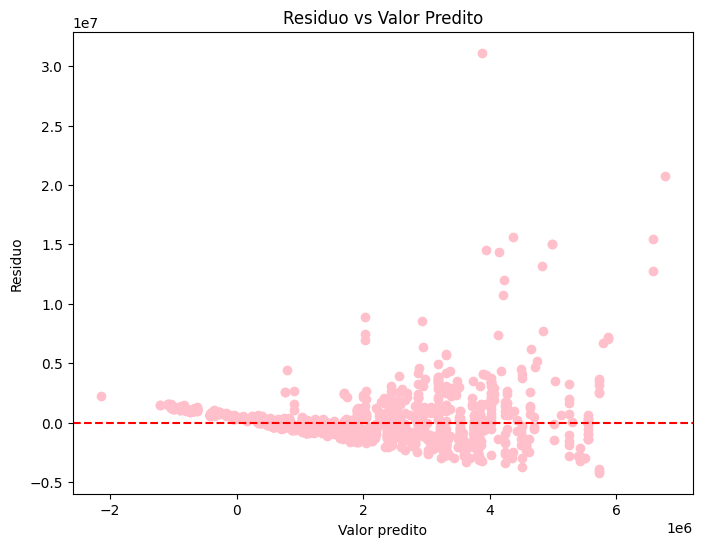

In [ ]:
# salva o dado do resíduo
residuals1 = model.resid
# calcula ovalor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals1, color='pink', alpha=1)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()